In [1]:
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers, models
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_data_path = "train"
valid_data_path = "validation"

In [8]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [9]:
training_data =  training_datagen.flow_from_directory(train_data_path,
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary')

Found 1027 images belonging to 2 classes.


In [10]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [11]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data =  valid_datagen.flow_from_directory(valid_data_path,
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary')

Found 256 images belonging to 2 classes.


In [12]:
valid_data.class_indices

{'horses': 0, 'humans': 1}

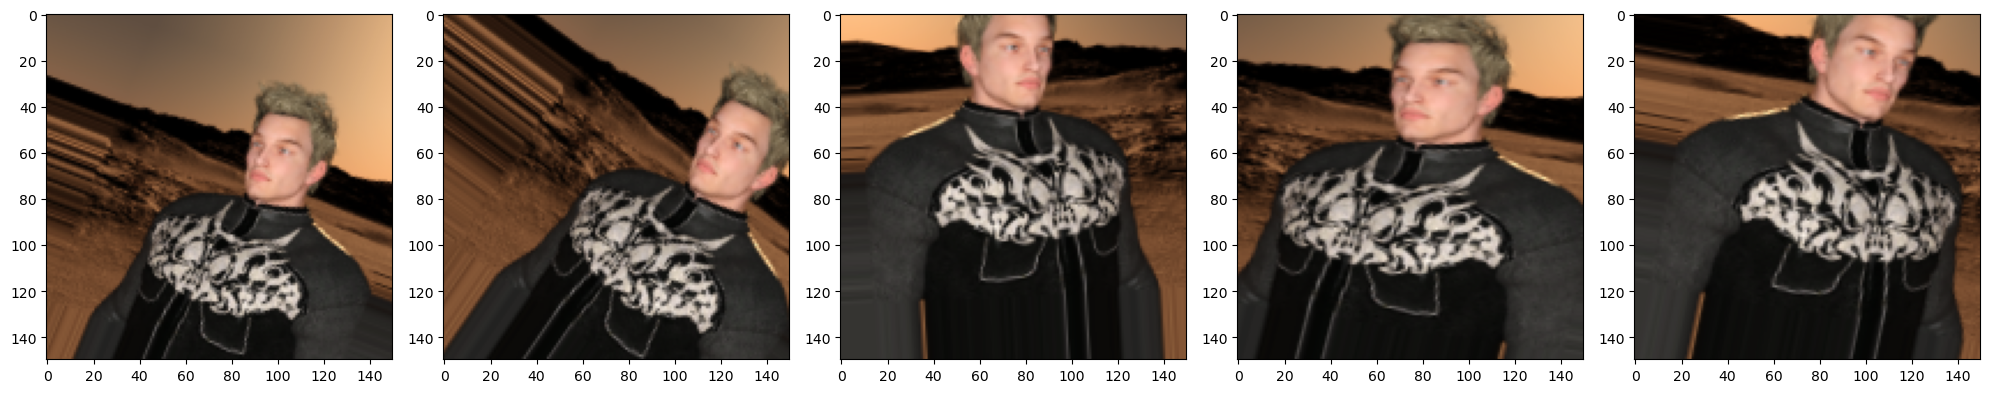

In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [14]:
#Building cnn model
cnn_model = keras.models.Sequential([
                          keras.layers.Conv2D(filters=32, kernel_size=3,input_shape=[150, 150, 3]),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=64, kernel_size=5),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=128, kernel_size=3),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=256, kernel_size=3),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          keras.layers.Flatten(), # neural network beulding
                          keras.layers.Dense(units=128, activation='relu'), # input layers
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(units=256, activation='relu'),
                          keras.layers.Dropout(0.25),
                          keras.layers.Dense(units=2, activation='sigmoid') # output layer
])

In [15]:
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model_path = 'horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [17]:
# train cnn model
history = cnn_model.fit(training_data,
                          epochs=5,
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/5



33/33 [==============================] - ETA: 0s - loss: 0.7536 - accuracy: 0.5920
Epoch 1: val_accuracy improved from -inf to 0.70312, saving model to horse_or_human_predictor.h5


C:\Users\khars\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 145s 4s/step - loss: 0.7536 - accuracy: 0.5920 - val_loss: 0.6021 - val_accuracy: 0.7031
Epoch 2/5
33/33 [==============================] - ETA: 0s - loss: 0.6037 - accuracy: 0.6884
Epoch 2: val_accuracy did not improve from 0.70312
33/33 [==============================] - 109s 3s/step - loss: 0.6037 - accuracy: 0.6884 - val_loss: 1.6864 - val_accuracy: 0.5547
Epoch 3/5
33/33 [==============================] - ETA: 0s - loss: 0.5358 - accuracy: 0.7498
Epoch 3: val_accuracy did not improve from 0.70312
33/33 [==============================] - 107s 3s/step - loss: 0.5358 - accuracy: 0.7498 - val_loss: 1.9615 - val_accuracy: 0.5938
Epoch 4/5
33/33 [==============================] - ETA: 0s - loss: 0.5098 - accuracy: 0.7624
Epoch 4: val_accuracy did not improve from 0.70312
33/33 [==============================] - 108s 3s/step - loss: 0.5098 - accuracy: 0.7624 - val_loss: 1.8587 - val_accuracy: 0.6875
Epoch 5/5
33/33 [==============================]

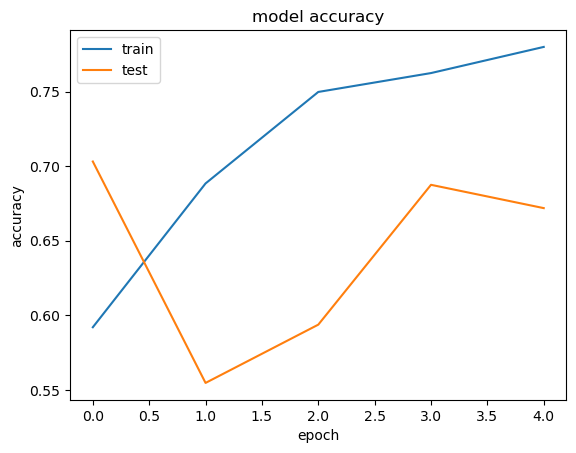

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

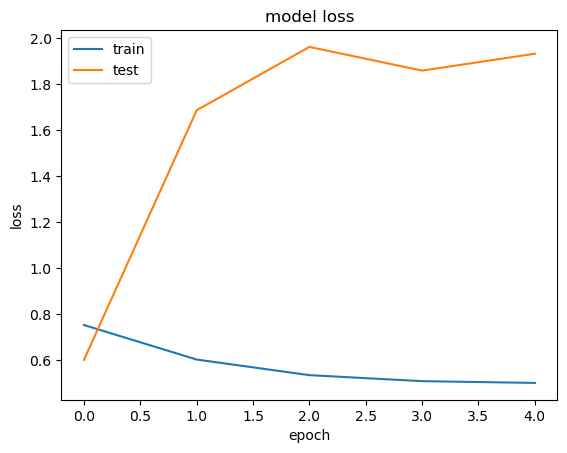

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Predict Horse or Human

# Here we are loading train CNN model to predict Given input (image) is Horse of Human

# Import Libraries

import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator

# Import Model

model_path = 'horse_or_human_predictor.h5'

model1 = keras.models.load_model(model_path)

# Preprocessing
# Image path
h1 = 'horse_img.png'
h2 = 'human_ima.png'

import numpy as np
from keras.preprocessing import image

def pred_human_horse(model, horse_or_human):
  test_image = image.load_img(horse_or_human, target_size = (150, 150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)

  result = model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result, "--->>>", pred)

  if pred == 0:
    print('Predicted>>> Horse')
  else:
    print('Predicted>>> Human')

# Predict Output

pred_human_horse(model1, h1)

1/1 [==============================] - 3s 3s/step
[[0.667 0.403]] --->>> 0
Predicted>>> Horse


In [21]:
pred_human_horse(model1,h2)

1/1 [==============================] - 0s 125ms/step
[[0.499 0.636]] --->>> 1
Predicted>>> Human
